<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>
# Convolutional Neural Networks for Image Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

##  Visualizing the Image Data

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

single_image.shape

(28, 28)

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

**NOTE: Don't be mistaken that this dataset is colored image. As we already knew that Matplotlib has different colormap and can choose to display greyscale image with default colormap.**

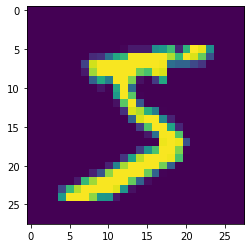

In [8]:
plt.imshow(single_image);

# PreProcessing Data

We first need to make sure the labels will be understandable by our CNN.

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### Why we need to One Hot Encode our label dataset?

NOTE: if we look at our label dataset, the label values are directly in Numbers such as 5, 8, etc.

If we use those numeric numbers directly, model will think it as continous value and will predict things like 5.2, 6.7, etc.

But we don't want that. Essentially our lable values are Categorial values. So we need to One Hot Encode it to avoid any misunderstading by our model.

Bascially this will become multi categorization problem.

## Labels

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train.shape

(60000,)

Hmmm, looks like our labels are literally categories of numbers. We need to translate this to be "one hot encoded" so our CNN can understand, otherwise it will think this is some sort of regression problem on a continuous axis. Luckily , Keras has an easy to use function for this:

In [12]:
y_example = to_categorical(y_train)

In [13]:
y_example.shape

(60000, 10)

In [14]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [16]:
y_example[0]  # which is number 5

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [18]:
y_cat_test = to_categorical(y_test, num_classes=10)

In [19]:
y_cat_train = to_categorical(y_train, num_classes=10)

### Processing X Data

We should normalize the X data

Bascially our X data is images where it has minimum value of 0 and maximum value of 255.

In [21]:
single_image.max()

255

In [22]:
single_image.min()

0

In [23]:
x_train = x_train / 255
x_test = x_test / 255

In [24]:
scaled_image = x_train[0]

In [25]:
scaled_image.min(), scaled_image.max()

(0.0, 1.0)

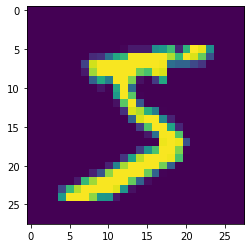

In [27]:
plt.imshow(scaled_image);

## Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [28]:
 x_train.shape

(60000, 28, 28)

Reshape to include channel dimension (in this case, 1 channel)

In [29]:
# batch size, height, width, color channels
x_train = x_train.reshape(60000, 28, 28, 1)

In [30]:
x_train.shape

(60000, 28, 28, 1)

In [31]:
x_test.shape

(10000, 28, 28)

In [33]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [34]:
x_test.shape

(10000, 28, 28, 1)

# Training the Model

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [37]:
28 * 28

784

In [39]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES (0 to 9 hand written digits)
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/ => for differenet metrics list
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

![cnn](cnn.png)

![cnn2](cnn2.png)

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

## Train the Model

In [43]:
model.fit(x=x_train, y=y_cat_train, 
          validation_data=(x_test, y_cat_test),
          epochs=10,
         callbacks=[early_stopping])

Epoch 1/10
1875/1875 [==============================] - 48s 24ms/step - loss: 0.1405 - accuracy: 0.9578 - val_loss: 0.0534 - val_accuracy: 0.9827
Epoch 2/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0470 - accuracy: 0.9854 - val_loss: 0.0487 - val_accuracy: 0.9844
Epoch 3/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0300 - accuracy: 0.9903 - val_loss: 0.0407 - val_accuracy: 0.9875
Epoch 4/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0210 - accuracy: 0.9934 - val_loss: 0.0393 - val_accuracy: 0.9874
Epoch 5/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0146 - accuracy: 0.9952 - val_loss: 0.0464 - val_accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0109 - accuracy: 0.9965 - val_loss: 0.0384 - val_accuracy: 0.9892
Epoch 7/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0082 - accuracy: 0.9972 - val_loss: 0.0398 -

## Evaluate the Model

In [44]:
# quick check on which metrics are available
model.metrics_names

['loss', 'accuracy']

In [45]:
metrics = pd.DataFrame(model.history.history)

In [46]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.140517,0.957750,0.053350,0.9827
1,0.047042,0.985383,0.048675,0.9844
2,0.030028,0.990317,0.040715,0.9875
3,0.020975,0.993400,0.039342,0.9874
4,0.014617,0.995250,0.046408,0.9864


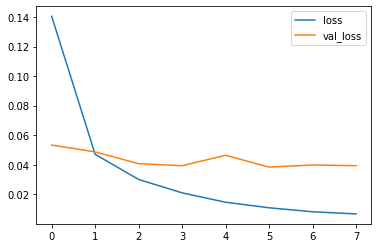

In [47]:
metrics[['loss', 'val_loss']].plot();

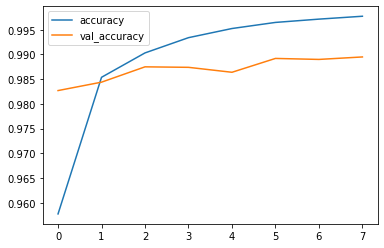

In [48]:
metrics[['accuracy', 'val_accuracy']].plot();

In [49]:
# Evaluation with test data

print(model.metrics_names)
print(model.evaluate(x_test, y_cat_test, verbose=0))

['loss', 'accuracy']
[0.039346493780612946, 0.9894999861717224]


In [50]:
from sklearn.metrics import classification_report, confusion_matrix

In [68]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [69]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [70]:
predictions.shape

(10000,)

In [71]:
y_cat_test.shape

(10000, 10)

In [72]:
y_test.shape

(10000,)

### Comparing with actual y_test values (no longer categorical encoded values)

In [73]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [75]:
confusion_matrix(y_test, predictions)

array([[ 972,    0,    1,    1,    0,    1,    3,    1,    1,    0],
       [   0, 1127,    0,    2,    0,    1,    2,    2,    0,    1],
       [   1,    0, 1020,    1,    0,    0,    1,    7,    2,    0],
       [   0,    0,    1, 1007,    0,    0,    0,    0,    1,    1],
       [   0,    0,    1,    0,  968,    0,    4,    0,    0,    9],
       [   0,    0,    0,   12,    0,  874,    3,    0,    2,    1],
       [   2,    2,    0,    0,    1,    1,  951,    0,    1,    0],
       [   0,    1,    4,    0,    0,    0,    0, 1017,    1,    5],
       [   2,    0,    2,    2,    0,    0,    0,    2,  963,    3],
       [   0,    0,    1,    1,    5,    2,    0,    3,    1,  996]],
      dtype=int64)

In [76]:
import seaborn as sns

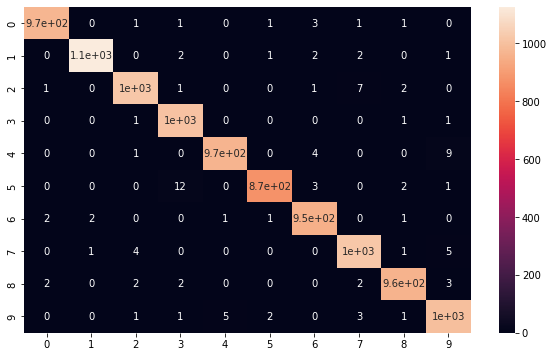

In [77]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True);

# Predicting a given image

In [78]:
my_number = x_test[0]

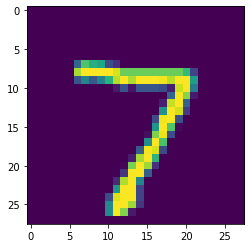

In [81]:
plt.imshow(my_number.reshape(28, 28));

In [82]:
np.argmax(model.predict(my_number.reshape(1, 28, 28, 1)), axis=-1)

array([7], dtype=int64)

Looks like the CNN performed quite well!